# Chargement des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pickle
import time
import logging
import sys
from wordcloud import WordCloud
from tqdm.notebook import tqdm
import random

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import words, stopwords



import sklearn
from sklearn import cluster, metrics, manifold, decomposition, preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer



from PIL import Image, ImageOps, ImageFilter

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16


import gensim
import cv2
import os
from os import listdir
os.environ["TF_KERAS"]='1'

import transformers
from transformers import *

import warnings  # supress warnings
warnings.filterwarnings('ignore')

In [2]:
print('Version de Python :\n')
print('- Python : ' + sys.version)
print('Versions des principales librairies utilisées :\n')
print('- Numpy : ' + np.__version__)
print('- Pandas : ' + pd.__version__)
print('- Matplotlib : ' + mpl.__version__)
print('- Seaborn : ' + sns.__version__)
print('- Scikit-Learn : ' + sklearn.__version__)
print('- Gensim : ' + gensim.__version__)
print('- OpenCV : ' + cv2.__version__)
print('- TensorFlow : ' + tf.__version__)
print('- Keras : ' + tensorflow.keras.__version__)
print('- NLTK : ' + nltk.__version__)
print('- Transformers : ' + transformers.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print('#'*70)
!jupyter --version

Version de Python :

- Python : 3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:00:33) 
[Clang 13.0.1 ]
Versions des principales librairies utilisées :

- Numpy : 1.22.4
- Pandas : 1.4.4
- Matplotlib : 3.5.3
- Seaborn : 0.12.0
- Scikit-Learn : 1.1.2
- Gensim : 4.2.0
- OpenCV : 4.5.5
- TensorFlow : 2.9.1
- Keras : 2.9.0
- NLTK : 3.6.7
- Transformers : 4.22.0.dev0
Num GPUs Available:  1
######################################################################
Selected Jupyter core packages...
IPython          : 8.4.0
ipykernel        : 6.15.2
ipywidgets       : 7.6.5
jupyter_client   : 7.3.5
jupyter_core     : 4.10.0
jupyter_server   : 1.18.1
jupyterlab       : 3.4.6
nbclient         : 0.5.13
nbconvert        : 6.4.4
nbformat         : 5.3.0
notebook         : 6.4.12
qtconsole        : not installed
traitlets        : 5.1.1


In [3]:
path = '/Users/gauthierrault/Desktop/P6/Flipkart/'
# Chargement et prise de connaissance du jeu de données
data = pd.read_csv(path + "flipkart_com-ecommerce_sample_1050.csv")

## Exploratory Data Analysis

In [109]:
data.sample(2).T

781  \
uniq_id                                   9924fba9b2a738e5a141995952e73104   
crawl_timestamp                                  2015-12-12 11:46:53 +0000   
product_url              http://www.flipkart.com/perucci-pc-222-decker-...   
product_name                 Perucci PC-222 Decker Analog Watch  - For Men   
product_category_tree    ["Watches >> Wrist Watches >> Perucci Wrist Wa...   
pid                                                       WATE6XU7GKU8KMGZ   
retail_price                                                        1900.0   
discounted_price                                                     290.0   
image                                 9924fba9b2a738e5a141995952e73104.jpg   
is_FK_Advantage_product                                              False   
description              Perucci PC-222 Decker Analog Watch  - For Men ...   
product_rating                                         No rating available   
overall_rating                                         No rating available   
brand                                                                  NaN   
product_specifications   {"product_specification"=>[{"key"=>"Chronograp...   
primary_category                                                   Watches   
processed_text           perucci decker analog watch men buy perucci de...   
length_processed_text                                                   34   
processed_text_dl        perucci decker analog watch for men buy perucc...   

                                                                       101  
uniq_id                                   c7fcd0d983a51283e58b806f065cc920  
crawl_timestamp                                  2016-01-04 00:20:04 +0000  
product_url              http://www.flipkart.com/diviniti-mdf-color-rel...  
product_name             Diviniti MDF Color Religious Wall Hanging Size...  
product_category_tree    ["Home Decor & Festive Needs >> Table Decor & ...  
pid                                                       SHIEBWNUB6QGHNGD  
retail_price                                                       13400.0  
discounted_price                                                   13400.0  
image                                 c7fcd0d983a51283e58b806f065cc920.jpg  
is_FK_Advantage_product                                              False  
description              Buy Diviniti MDF Color Religious Wall Hanging ...  
product_rating                                         No rating available  
overall_rating                                         No rating available  
brand                                                             Diviniti  
product_specifications   {"product_specification"=>[{"key"=>"Brand", "v...  
primary_category                                Home Decor & Festive Needs  
processed_text           buy diviniti mdf color wall hanging size radha...  
length_processed_text                                                   31  
processed_text_dl        buy diviniti mdf color wall hanging size radha...

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [110]:
data.dtypes.value_counts()

object     15
float64     2
bool        1
int64       1
dtype: int64

In [111]:
data.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
primary_category              7
processed_text              982
length_processed_text       151
processed_text_dl           983
dtype: int64

In [112]:
data.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
primary_category             0
processed_text               0
length_processed_text        0
processed_text_dl            0
dtype: int64

In [114]:
data.duplicated().sum()

0

In [119]:
data.duplicated(subset="product_name").sum()

0

In [137]:
data.duplicated(subset="uniq_id").sum()

0

In [116]:
for col in data.columns : 
    n = data.duplicated(subset=col).sum()
    print(f"col : {col} -> duplicated : {n}")

col : uniq_id -> duplicated : 0
col : crawl_timestamp -> duplicated : 901
col : product_url -> duplicated : 0
col : product_name -> duplicated : 0
col : product_category_tree -> duplicated : 408
col : pid -> duplicated : 0
col : retail_price -> duplicated : 695
col : discounted_price -> duplicated : 625
col : image -> duplicated : 0
col : is_FK_Advantage_product -> duplicated : 1048
col : description -> duplicated : 0
col : product_rating -> duplicated : 1023
col : overall_rating -> duplicated : 1023
col : brand -> duplicated : 559
col : product_specifications -> duplicated : 65
col : primary_category -> duplicated : 1043
col : processed_text -> duplicated : 68
col : length_processed_text -> duplicated : 899
col : processed_text_dl -> duplicated : 67


<AxesSubplot:>

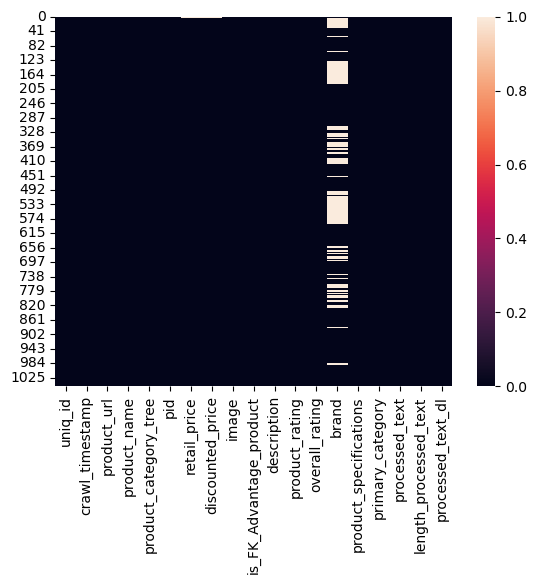

In [113]:
sns.heatmap(data.isna())

In [117]:
data.describe(include=np.number)

retail_price  discounted_price  length_processed_text
count    1049.000000       1049.000000            1050.000000
mean     2186.197331       1584.527169              47.989524
std      7639.229411       7475.099680              43.335555
min        35.000000         35.000000               9.000000
25%       555.000000        340.000000              20.000000
50%       999.000000        600.000000              29.000000
75%      1999.000000       1199.000000              62.750000
max    201000.000000     201000.000000             318.000000

In [118]:
data.describe(include=object)

uniq_id            crawl_timestamp  \
count                               1050                       1050   
unique                              1050                        149   
top     55b85ea15a1536d46b7190ad6fff8ce7  2015-12-01 12:40:44 +0000   
freq                                   1                        150   

                                              product_url  \
count                                                1050   
unique                                               1050   
top     http://www.flipkart.com/elegance-polyester-mul...   
freq                                                    1   

                                             product_name  \
count                                                1050   
unique                                               1050   
top     Elegance Polyester Multicolor Abstract Eyelet ...   
freq                                                    1   

                                    product_category_tree               pid  \
count                                                1050              1050   
unique                                                642              1050   
top     ["Home Furnishing >> Bed Linen >> Blankets, Qu...  CRNEG7BKMFFYHQ8Z   
freq                                                   56                 1   

                                       image  \
count                                   1050   
unique                                  1050   
top     55b85ea15a1536d46b7190ad6fff8ce7.jpg   
freq                                       1   

                                              description  \
count                                                1050   
unique                                               1050   
top     Key Features of Elegance Polyester Multicolor ...   
freq                                                    1   

             product_rating       overall_rating         brand  \
count                  1050                 1050           712   
unique                   27                   27           490   
top     No rating available  No rating available  PRINT SHAPES   
freq                    889                  889            11   

                                   product_specifications primary_category  \
count                                                1049             1050   
unique                                                984                7   
top     {"product_specification"=>[{"key"=>"Type", "va...  Home Furnishing   
freq                                                   22              150   

                                           processed_text  \
count                                                1050   
unique                                                982   
top     printland ceramic mug price printland coffee m...   
freq                                                   12   

                                        processed_text_dl  
count                                                1050  
unique                                                983  
top     printland ceramic mug price printland coffee m...  
freq                                                   12

In [7]:
description = data['description']
description

0       Key Features of Elegance Polyester Multicolor ...
1       Specifications of Sathiyas Cotton Bath Towel (...
2       Key Features of Eurospa Cotton Terry Face Towe...
3       Key Features of SANTOSH ROYAL FASHION Cotton P...
4       Key Features of Jaipur Print Cotton Floral Kin...
                              ...                        
1045    Oren Empower Extra Large Self Adhesive Sticker...
1046    Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047    Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048    Buy Wallmantra Medium Vinyl Sticker Sticker fo...
1049    Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...
Name: description, Length: 1050, dtype: object

In [8]:
data['product_category_tree'].nunique()

642

In [9]:
data['primary_category'] = data['product_category_tree'].apply(lambda p : p.replace('[', '').replace('"', '')
                                                               .split('>>')[0].strip())

In [139]:
data['primary_category'].nunique()

7

In [10]:
data['primary_category'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [11]:
data.groupby(by='primary_category').count()

uniq_id  crawl_timestamp  product_url  \
primary_category                                                    
Baby Care                       150              150          150   
Beauty and Personal Care        150              150          150   
Computers                       150              150          150   
Home Decor & Festive Needs      150              150          150   
Home Furnishing                 150              150          150   
Kitchen & Dining                150              150          150   
Watches                         150              150          150   

                            product_name  product_category_tree  pid  \
primary_category                                                       
Baby Care                            150                    150  150   
Beauty and Personal Care             150                    150  150   
Computers                            150                    150  150   
Home Decor & Festive Needs           150                    150  150   
Home Furnishing                      150                    150  150   
Kitchen & Dining                     150                    150  150   
Watches                              150                    150  150   

                            retail_price  discounted_price  image  \
primary_category                                                    
Baby Care                            149               149    150   
Beauty and Personal Care             150               150    150   
Computers                            150               150    150   
Home Decor & Festive Needs           150               150    150   
Home Furnishing                      150               150    150   
Kitchen & Dining                     150               150    150   
Watches                              150               150    150   

                            is_FK_Advantage_product  description  \
primary_category                                                   
Baby Care                                       150          150   
Beauty and Personal Care                        150          150   
Computers                                       150          150   
Home Decor & Festive Needs                      150          150   
Home Furnishing                                 150          150   
Kitchen & Dining                                150          150   
Watches                                         150          150   

                            product_rating  overall_rating  brand  \
primary_category                                                    
Baby Care                              150             150    134   
Beauty and Personal Care               150             150     41   
Computers                              150             150    150   
Home Decor & Festive Needs             150             150    148   
Home Furnishing                        150             150    150   
Kitchen & Dining                       150             150     79   
Watches                                150             150     10   

                            product_specifications  
primary_category                                    
Baby Care                                      150  
Beauty and Personal Care                       150  
Computers                                      150  
Home Decor & Festive Needs                     149  
Home Furnishing                                150  
Kitchen & Dining                               150  
Watches                                        150

# 1.1 - Preprocessing NLTK

In [12]:
def tokenizer_fct(sentence):
    """Tokéniser une phrase donnée avec NLTK""" 
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

In [13]:
def process_text(doc, rejoin=False, apply_stopwords=True, list_rare_words=None, min_len_word=3, 
                 force_is_alpha=True, lem_or_stem=None, eng_words=None):
    """Text processing avec NLTK""" 
    # Lister des mots uniques
    if not list_rare_words:
        list_rare_words = []     
    # minuscule
    doc = doc.lower().strip()   
    # Tokenize
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    raw_token_list = tokenizer.tokenize(doc)  
    # classic stopwords
    if apply_stopwords:
        stop_words = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']
    else:
        stop_words = []
    cleaned_token_list = [w for w in raw_token_list if w not in stop_words]   
    # suppression de tokens rares 
    non_rare_tokens = [w for w in cleaned_token_list if w not in list_rare_words]   
    # suppression des mots trop court
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]  
    # uniquement les caractères alpha
    if force_is_alpha:
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else:
        alpha_tokens = more_than_N       
    # Stemming ou lemmatization
    if not lem_or_stem:
        trans_text = alpha_tokens
    elif lem_or_stem == "lem":
        trans = nltk.stem.WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_tokens]
    else:
        trans = nltk.stem.PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_tokens]      
    # suppression des mots non anglais
    if eng_words:
        eng_text = [i for i in trans_text if i in eng_words]
    else:
        eng_text = trans_text   
    # gestion du type de retour
    if rejoin:
        return " ".join(eng_text)
    else:
        return eng_text   

In [124]:
print("Nombres de mots : {:,}".format(len(raw_corpus)))

Nombres de mots : 498,561


In [14]:
raw_corpus = " ".join(data['description'])

In [15]:
raw_corpus[:1000]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [125]:
print("Nombres de mots : {:,}".format(len(raw_corpus[:1000])))

Nombres de mots : 1,000


In [16]:
tmp = pd.Series(tokenizer_fct(raw_corpus)).value_counts()
tmp

.              4259
,              3133
of             1662
and            1167
the            1015
               ... 
Include           1
Protocols         1
attachment.       1
cleaner           1
Rs.1333           1
Length: 8086, dtype: int64

In [126]:
tmp.describe()

count    3636.000000
mean       13.858361
std        47.185134
min         1.000000
25%         2.000000
50%         3.000000
75%         8.000000
max       864.000000
dtype: float64

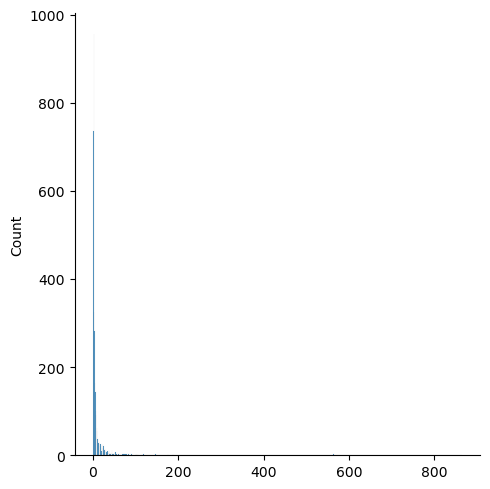

In [127]:
sns.displot(tmp)

<AxesSubplot:>

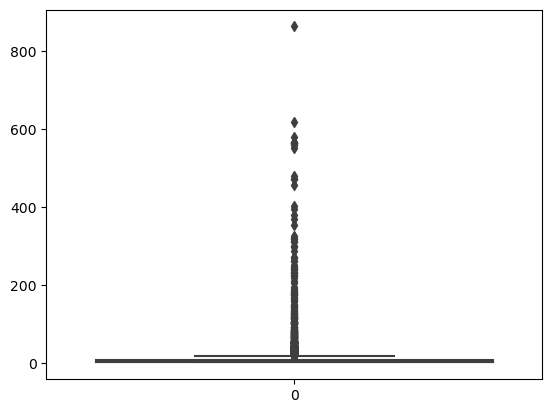

In [128]:
sns.boxplot(tmp)

In [17]:
# Recherche du nombre de mots et de mots uniques avant le prétraitement
print("Nombres de mots : {:,}".format(len(tokenizer_fct(raw_corpus))))
print("Nombres de mots uniques : {:,}".format(len(set(tokenizer_fct(raw_corpus)))))

Nombres de mots : 91,336
Nombres de mots uniques : 8,086


In [133]:
# Définition de la liste de mots uniques
list_rare_words = list(tmp[tmp == 1].index)
list_rare_words[:10]

['addiction',
 'hairstyling',
 'hawaii',
 'humor',
 'kamasutra',
 'rio',
 'warrenty',
 'nature',
 'rage',
 'horizon']

In [19]:
len(list_rare_words)

2841

In [20]:
# Processing
test_corpus = process_text(raw_corpus, rejoin=True, list_rare_words=list_rare_words, min_len_word=3, 
                           force_is_alpha=True, lem_or_stem="lem", eng_words=None)

In [21]:
tmp = pd.Series(tokenizer_fct(test_corpus)).value_counts()
tmp

product     864
free        618
buy         581
delivery    567
shipping    564
           ... 
tiddly        1
dco           1
thrade        1
wink          1
brillare      1
Length: 3636, dtype: int64

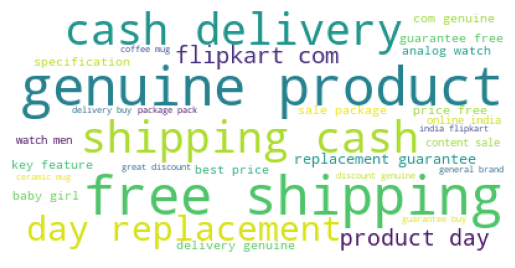

In [22]:
# Visualisation avec wordcloud
wordcloud = WordCloud(background_color='white', 
                      stopwords=[], 
                      max_words=50).generate(test_corpus)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [23]:
# Recherche de la longueur des distributions
data['processed_text'] = data['description'].apply(lambda p : process_text(p, rejoin=False, 
                                                                           list_rare_words=list_rare_words, min_len_word=3, 
                                                                           force_is_alpha=True, 
                                                                           lem_or_stem="lem", eng_words=None))
data['length_processed_text'] = data['processed_text'].apply(len)
data['length_processed_text'].describe()

count    1050.000000
mean       47.989524
std        43.335555
min         9.000000
25%        20.000000
50%        29.000000
75%        62.750000
max       318.000000
Name: length_processed_text, dtype: float64

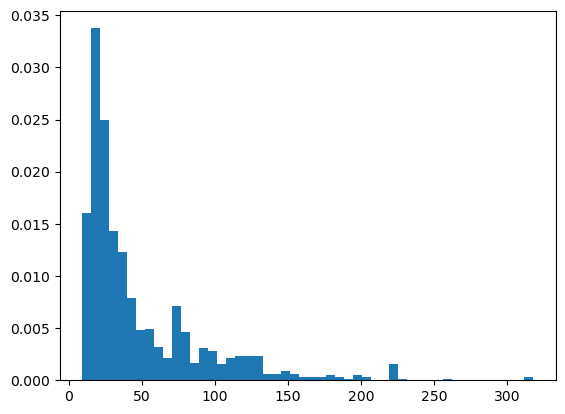

In [24]:
plt.hist(data['length_processed_text'], bins=50, density=True)
plt.show()

In [25]:
# Application sur le jeu de données
data['processed_text'] = data['description'].apply(lambda p : process_text(p, rejoin=True, apply_stopwords=True, 
                                                                           list_rare_words=list_rare_words, min_len_word=3,
                                                                           force_is_alpha=True, 
                                                                           lem_or_stem="lem", eng_words=None))
data['processed_text_dl'] = data['description'].apply(lambda p : process_text(p, rejoin=True, apply_stopwords=False,
                                                                              list_rare_words=list_rare_words, 
                                                                              min_len_word=3, force_is_alpha=True, 
                                                                              lem_or_stem=None, eng_words=None))

# 1.2 - Bag of words (CountVectorizer et Tf-idf)

In [26]:
l_cat = list(set(data['primary_category']))
print("Catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(data.iloc[i]['primary_category'])) for i in range(len(data))]

Catégories :  ['Home Decor & Festive Needs', 'Home Furnishing', 'Kitchen & Dining', 'Beauty and Personal Care', 'Watches', 'Baby Care', 'Computers']


In [27]:
def ARI_fct(features, l_cat, y_cat_num):
    """ Calcul de TSNE, regroupement de KMeans et calcul du score ARI entre les labels réelles et celles de KMeans"""  
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)  
    # KMeans clustering avec les données transformées TSNE
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)   
    # Comparaison des labels réelles avec le clustering à l'aide d'ARI
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2) 
    return ARI, X_tsne, cls.labels_

In [28]:
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI, l_cat):
    """Visualisation de TSNE avec les labels réelles et le clustering KMeans"""
    fig = plt.figure(figsize=(15,6))   
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('T-SNE des catégories réelles')  
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('T-SNE des clustering')  
    plt.show()
    print("ARI : ", ARI)
    

In [140]:
# Création d'un bag of words CountVectorizer
cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
feat = 'processed_text'
cv_fit = cvect.fit(data[feat])
cv_transform = cvect.transform(data[feat])  

In [30]:
print("CountVectorizer : ")
print('#'*70)
ARI, X_tsne, labels = ARI_fct(cv_transform, l_cat, y_cat_num)

CountVectorizer : 
######################################################################
ARI :  0.4123 time :  6.0


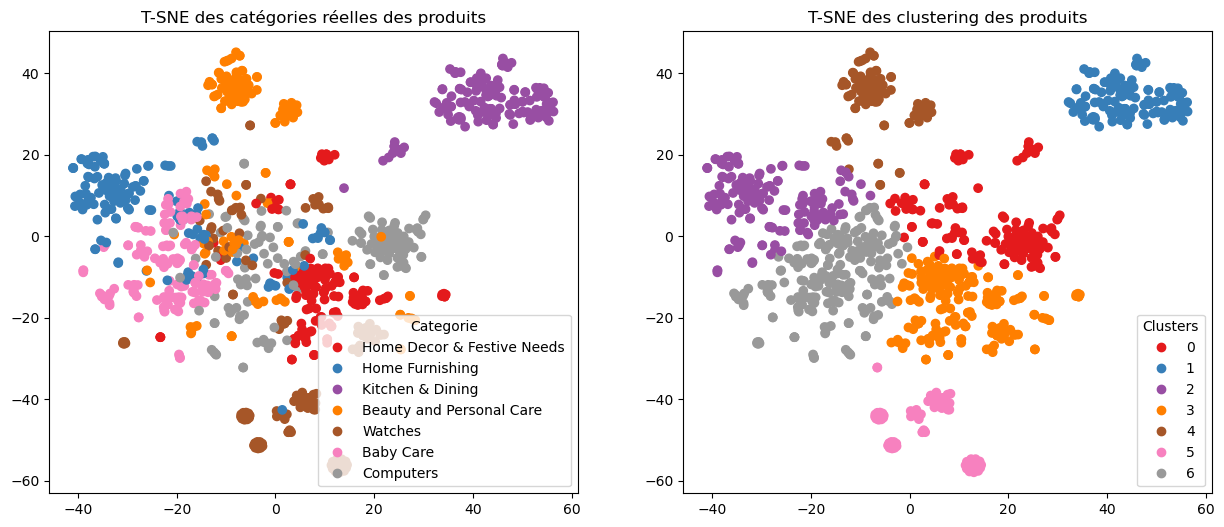

ARI :  0.4123


In [31]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI, l_cat)

In [32]:
# Création d'un bag of words Tf-idf
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)
feat = 'processed_text'
ctf_fit = ctf.fit(data[feat]) 
ctf_transform = ctf.transform(data[feat])

In [33]:
print("Tf-idf : ")
print('#'*70)
ARI, X_tsne, labels = ARI_fct(ctf_transform, l_cat, y_cat_num)

Tf-idf : 
######################################################################
ARI :  0.4679 time :  5.0


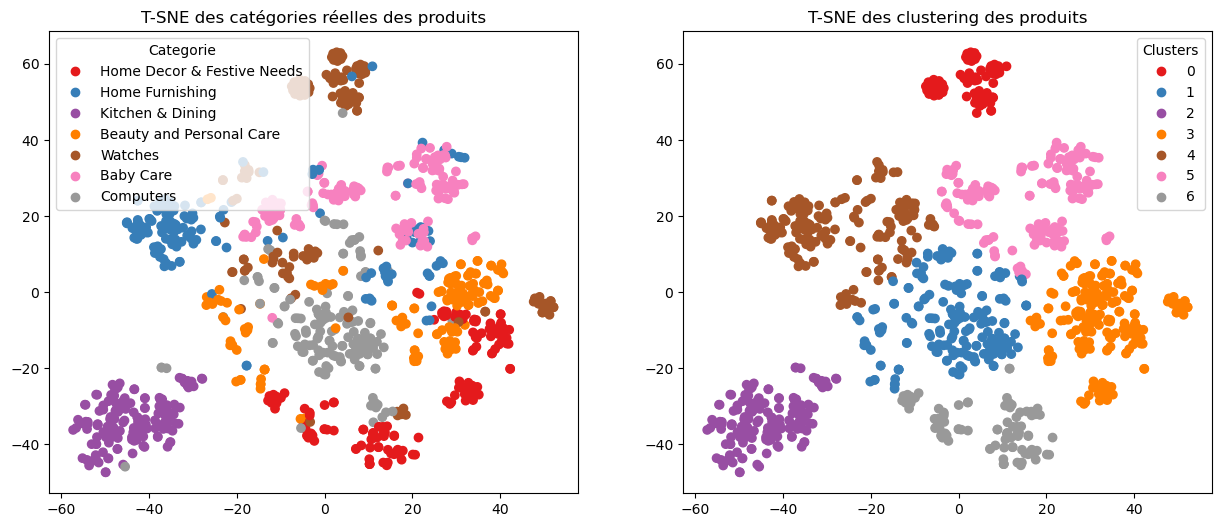

ARI :  0.4679


In [34]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI, l_cat)

# 1.3 - Word2vec

In [35]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = data['processed_text'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [36]:
# Création et training du modèle Word2Vec
print("Construction et training avec le modèle Word2Vec ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Taille du vocabulaire : %i" % len(w2v_words))
print("Word2Vec trained")

Construction et training avec le modèle Word2Vec ...
Taille du vocabulaire : 3634
Word2Vec trained


In [37]:
# Préparation des phrases (tokenization)
print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences), maxlen=maxlen, padding='post')
num_words = len(tokenizer.word_index) + 1
print("Nombre de mots uniques : %i" % num_words)

Fit Tokenizer ...
Nombre de mots uniques : 3635


In [38]:
print("Création d'une Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]           
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Création d'une Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (3635, 300)


In [39]:
# Creation du modèle
input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)
embed_model.summary()

Metal device set to: Apple M1
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           1090500   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,090,500
Trainable params: 1,090,500
Non-trainable params: 0
_________________________________________________________________


2022-09-20 10:48:19.539550: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-20 10:48:19.539840: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [40]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

 1/33 [..............................] - ETA: 2s

2022-09-20 10:48:19.638023: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-20 10:48:19.691534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 0s 1ms/step


(1050, 300)

In [41]:
ARI, X_tsne, labels = ARI_fct(embeddings, l_cat, y_cat_num)

ARI :  0.2728 time :  5.0


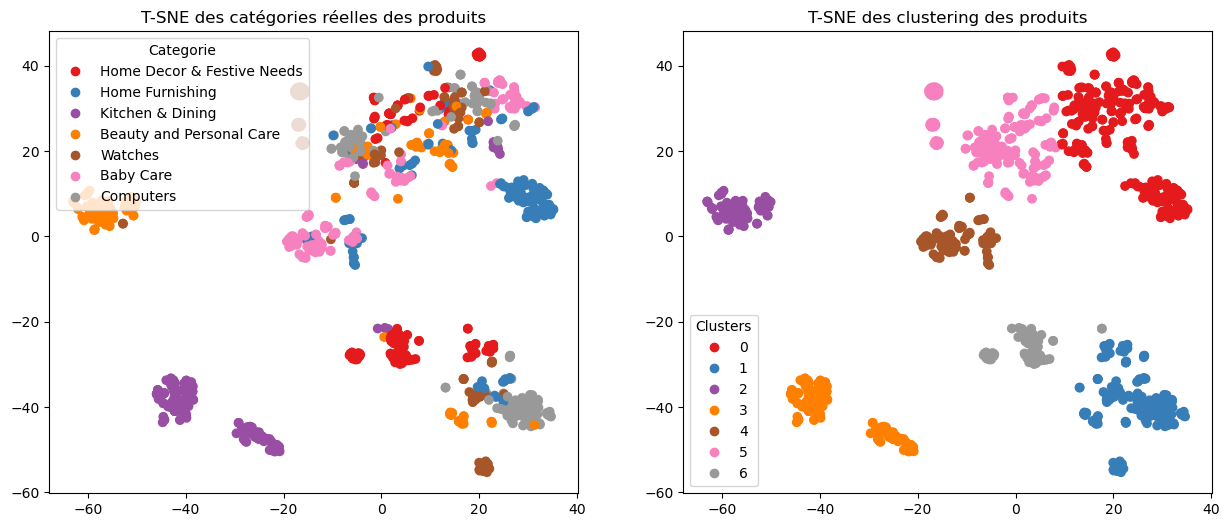

ARI :  0.2728


In [42]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI, l_cat)

# 1.4 - BERT Bidirectional Encoder Representations from Transformers

In [43]:
def bert_inp_fct(sentences, bert_tokenizer, max_length):
    """Processing des phrases"""  
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []
    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")   
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))
    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)  
    return input_ids, token_type_ids, attention_mask, bert_inp_tot   

In [44]:
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF'):
    """Creation des features"""  
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()
    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)       
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state
        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))   
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)    
    time2 = np.round(time.time() - time1,0)
    print("temps de traitement : ", time2)    
    return features_bert, last_hidden_states_tot

In [45]:
# Creation du modèle 
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = transformers.TFAutoModel.from_pretrained(model_type)

loading configuration file config.json from cache at /Users/gauthierrault/.cache/huggingface/hub/models--bert-base-uncased/snapshots/bdb420bf56ef3f72ee07cd75ab6df1b765b6012a/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.22.0.dev0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file tf_model.h5 from cache at /Users/gauthierrault/.cache/huggingface/hub/models--bert-base-uncased/snapshots/bdb420bf56ef3f72ee07c

In [46]:
# Application sur the data set
data['processed_text'] = data['description'].apply(lambda p : process_text(p, rejoin=True, apply_stopwords=True,
                                                                           list_rare_words=list_rare_words, 
                                                                           min_len_word=3, force_is_alpha=True,
                                                                           lem_or_stem="lem", eng_words=None))
data['processed_text_dl'] = data['description'].apply(lambda p : process_text(p, rejoin=True, apply_stopwords=False,
                                                                              list_rare_words=list_rare_words, 
                                                                              min_len_word=3, force_is_alpha=True,
                                                                              lem_or_stem=None, eng_words=None))

In [47]:
# Creation des features
sentences = data['processed_text_dl'].to_list()
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

loading configuration file config.json from cache at /Users/gauthierrault/.cache/huggingface/hub/models--bert-base-uncased/snapshots/bdb420bf56ef3f72ee07cd75ab6df1b765b6012a/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.22.0.dev0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at /Users/gauthierrault/.cache/huggingface/hub/models--bert-base-uncased/snapshots/bdb420bf56ef3f72ee07cd75ab6df1b

1/1 [==============================] - 0s 38ms/step
temps de traitement :  20.0


In [48]:
ARI, X_tsne, labels = ARI_fct(features_bert, l_cat, y_cat_num)

ARI :  0.3276 time :  5.0


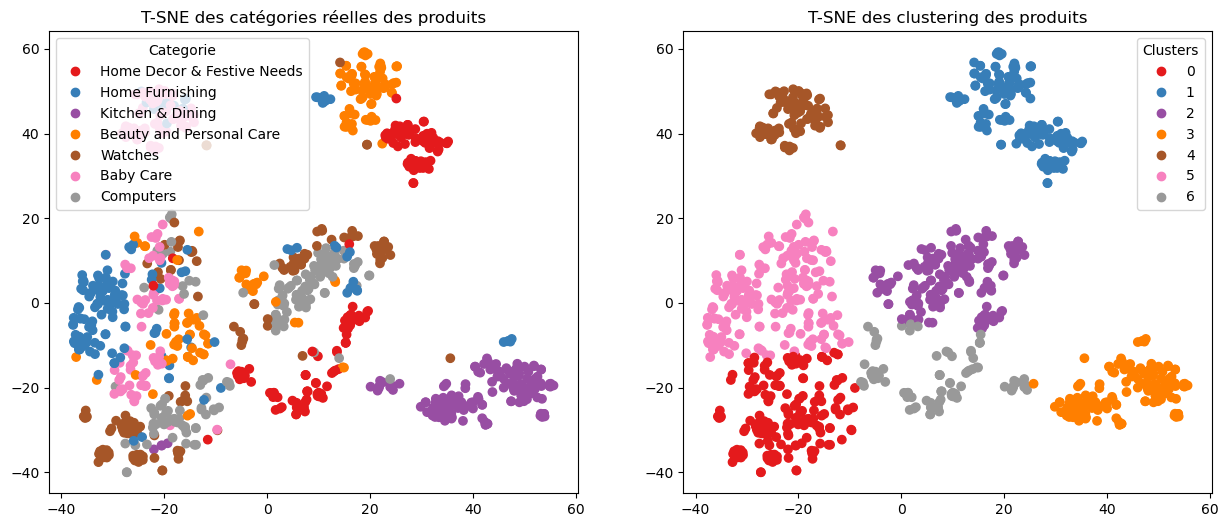

ARI :  0.3276


In [49]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI, l_cat)

# 1.5 - USE (Universal Sentence Encoder) 

In [50]:
def feature_USE_fct(sentences, b_size, embed):
    """USE text model"""   
    batch_size = b_size
    time1 = time.time()
    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])
        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))
    time2 = np.round(time.time() - time1,0)
    return features

In [51]:
# Chargement du modèle
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
embed = hub.load(module_url)
#embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

2022-09-20 11:00:55.192390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [52]:
batch_size = 10
sentences = data['processed_text_dl'].to_list()

In [53]:
features_USE = feature_USE_fct(sentences, batch_size, embed)

2022-09-20 11:00:56.068119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [54]:
ARI, X_tsne, labels = ARI_fct(features_USE, l_cat, y_cat_num)

ARI :  0.4285 time :  5.0


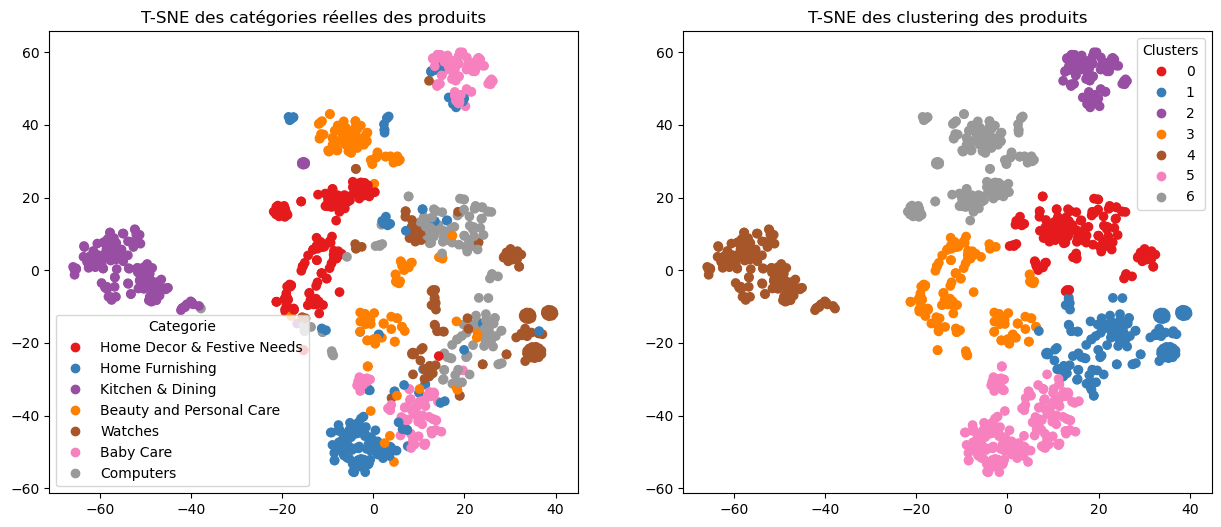

ARI :  0.4285


In [55]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI, l_cat)

# 2 EDA images

In [56]:
def display_img(img):
    """Affichage de l'image chargée dans une figure (6,6) sans axe"""  
    plt.figure(figsize=(6,6))
    plt.axis('off')
    plt.imshow(img)
    plt.show()

In [57]:
def build_histogram(kmeans, des, image_num):
    """Creation d'un bag-of-visual-words avec un Kmeans trained avec un tableau de descripteurs de l'image"""   
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("histogram image problem  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist

In [58]:
path = "/Users/gauthierrault/Desktop/P6/Flipkart/Images/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1050


Home Furnishing
-------


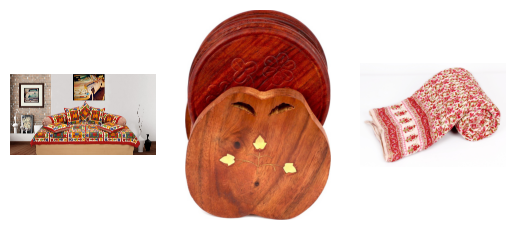

Baby Care
-------


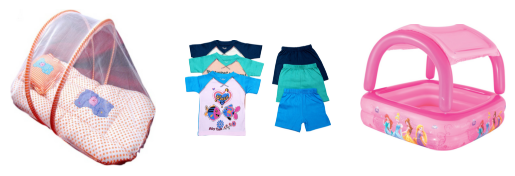

Watches
-------


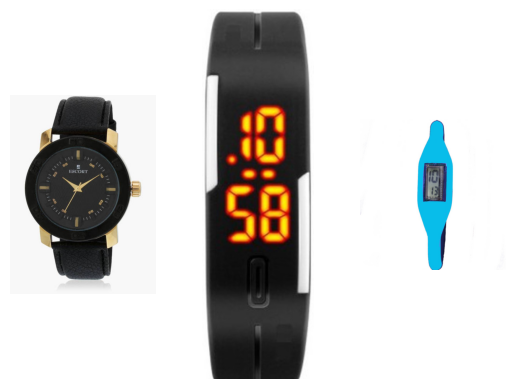

Home Decor & Festive Needs
-------


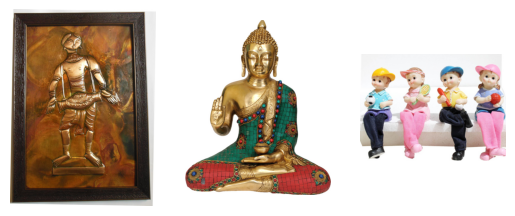

Kitchen & Dining
-------


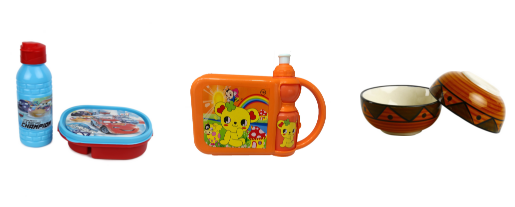

Beauty and Personal Care
-------


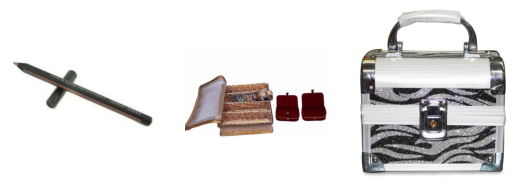

Computers
-------


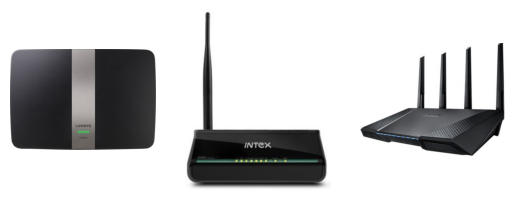

In [59]:
for name in data['primary_category'].unique():
    print(name)
    print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = path + data[data["primary_category"] == name]['image'].iloc[i+10]
        image = imread(filename)
        plt.axis('off')
        plt.imshow(image)
    plt.show()

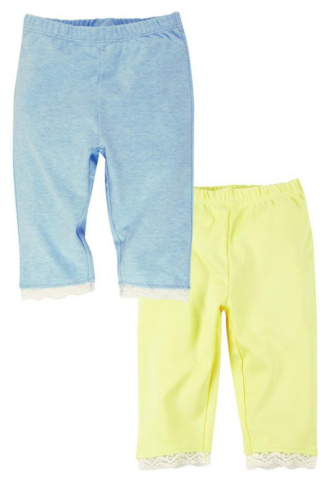

Categorie : Baby Care


In [60]:
# Sélection d'une image au hasard
img_number = random.randint(0,len(data['image']))
filename = path + data['image'].iloc[img_number]
# Chargement et affichage de l'image
img_init = Image.open(filename) 
display_img(img_init)    
print("Categorie : {}".format(data['primary_category'].iloc[img_number]))

In [61]:
# Caractéristiques de l'image
w, h = img_init.size
print("Width : {} px, height : {} px".format(w, h))
print("Pixels format : {}".format(img_init.mode))
mat = np.array(img_init)
print("Pixels matrix size : {}".format(mat.shape))

Width : 668 px, height : 1000 px
Pixels format : RGB
Pixels matrix size : (1000, 668, 3)


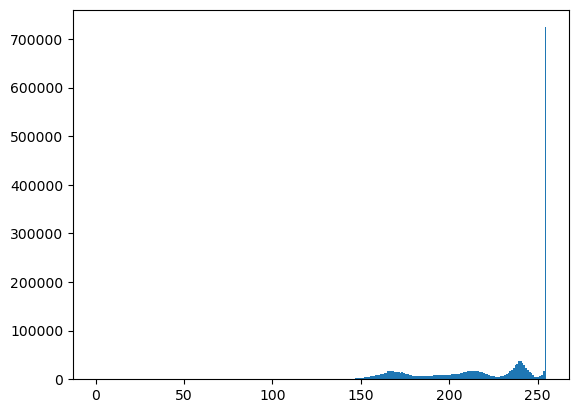

In [62]:
# Histogramme de l'image
n, bins, patches = plt.hist(mat.flatten(), bins=range(256))
plt.show()

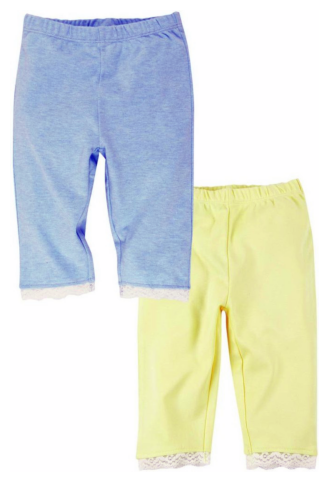

In [63]:
# Spreading histogram
img_autocontrast = ImageOps.autocontrast(img_init)
display_img(img_autocontrast)

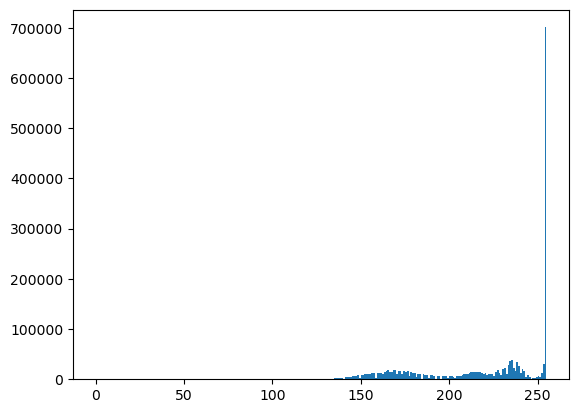

In [64]:
n, bins, patches = plt.hist(np.array(img_autocontrast).flatten(), bins=range(256))
plt.show()

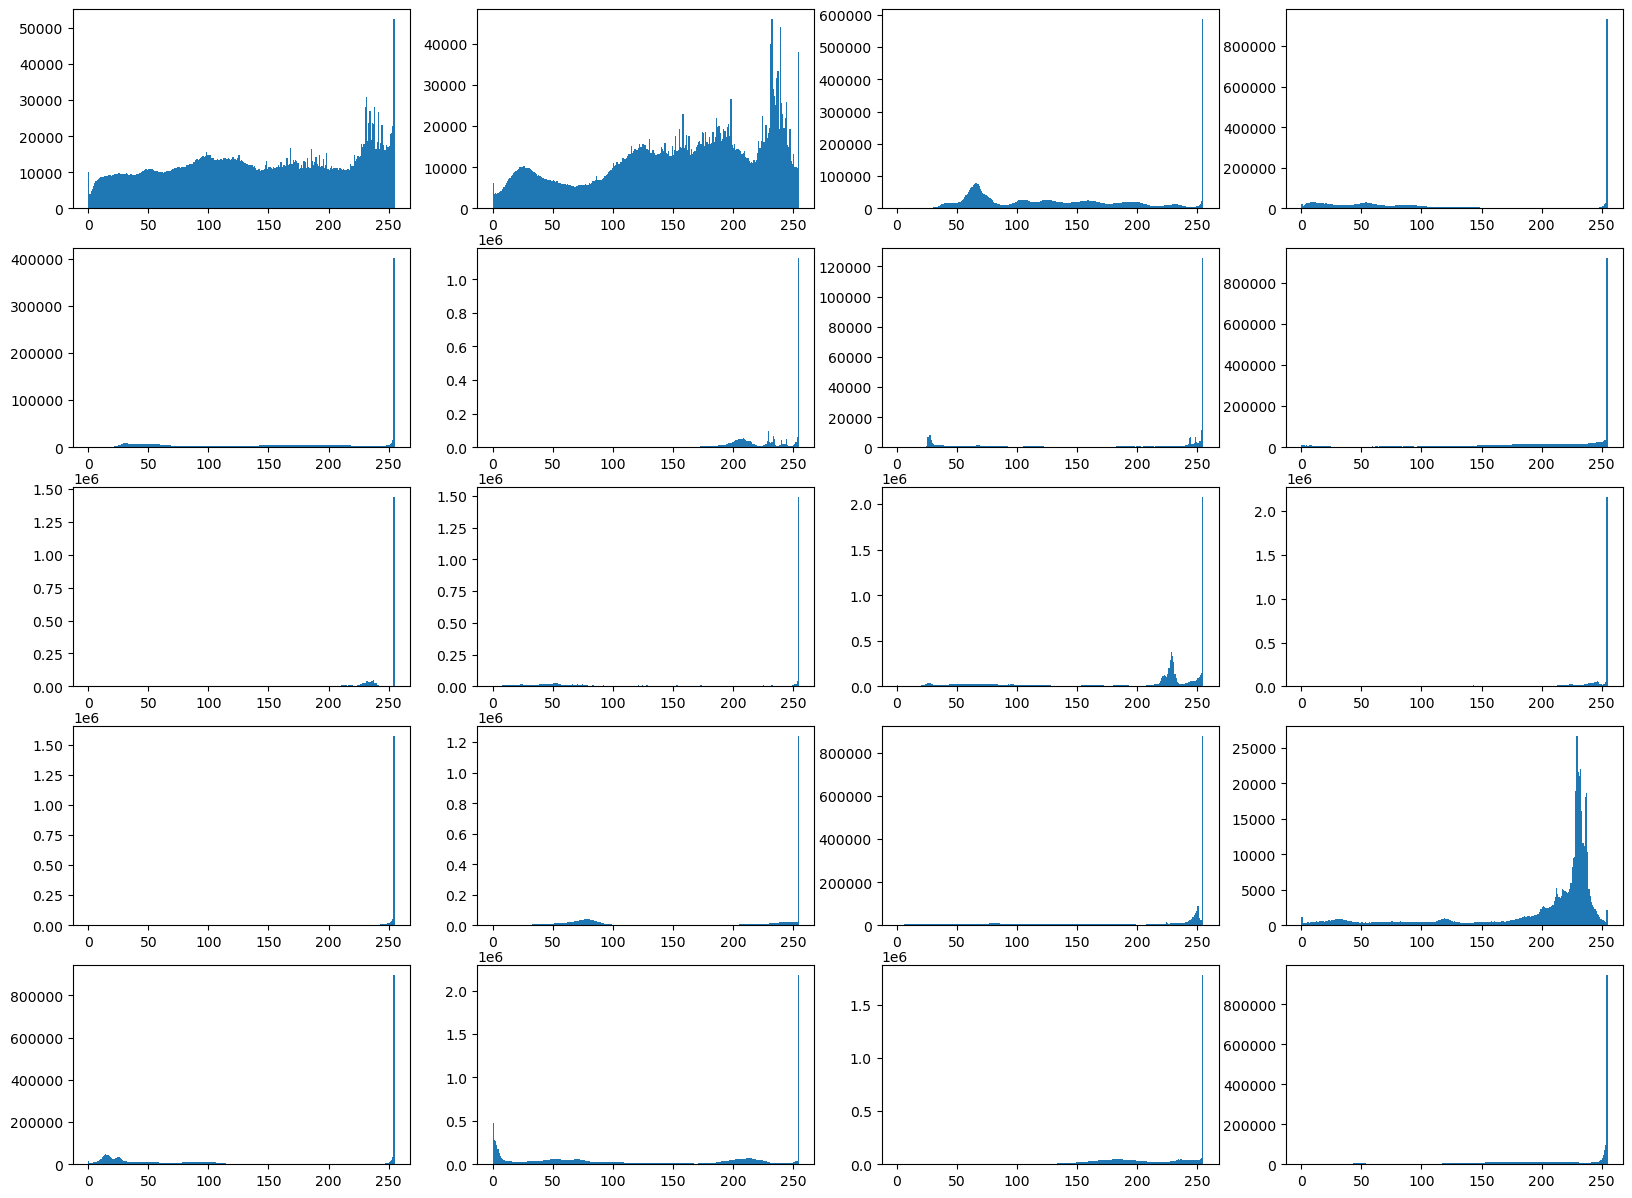

In [65]:
# Il ne semble pas avoir de problèmes d'exposition sur cette image, regardons plus en détails
plt.figure(figsize=(20,15))
for i in range(20):
    # image au hasard
    img_number = random.randint(0,len(data['image']))
    filename = path + data['image'].iloc[img_number]
    # chargement
    img = Image.open(filename)
    mat = np.array(img)
    plt.subplot(5,4,i+1)
    n, bins, patches = plt.hist(mat.flatten(), bins=range(256))
plt.show()

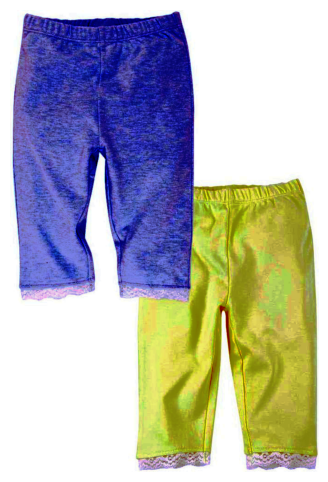

In [66]:
# Equalizing
img_equalize = ImageOps.equalize(img_init)
display_img(img_equalize)

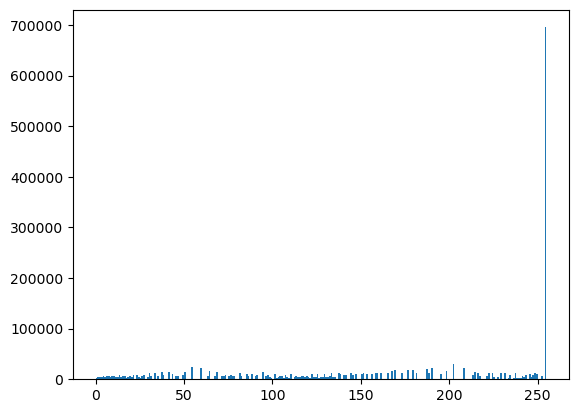

In [67]:
n, bins, patches = plt.hist(np.array(img_equalize).flatten(), bins=range(256))
plt.show()

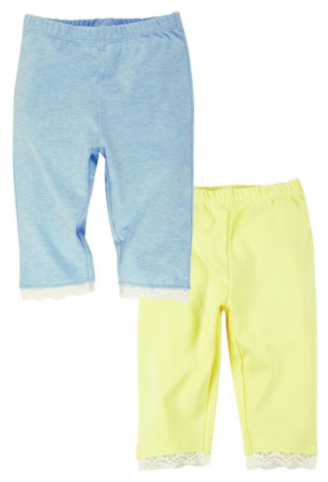

In [68]:
# Average filter
img_blur = img_init.filter(ImageFilter.BoxBlur(1))
display_img(img_blur)

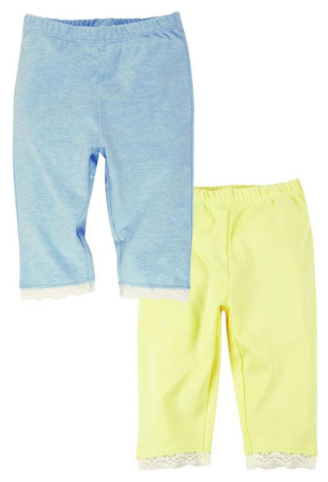

In [69]:
# Filtre gaussien
img_gaussian = img_init.filter(ImageFilter.GaussianBlur(radius=0.5))
display_img(img_gaussian)

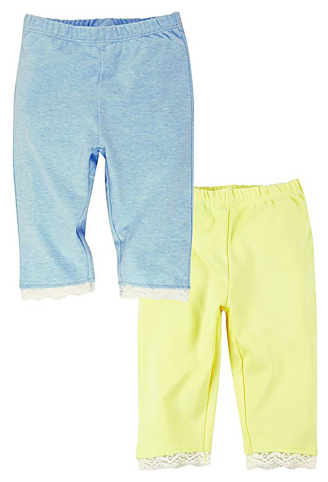

In [70]:
# Masque flou
img_unsharp = img_init.filter(ImageFilter.UnsharpMask(radius=2, percent=150, threshold=3))
display_img(img_unsharp)

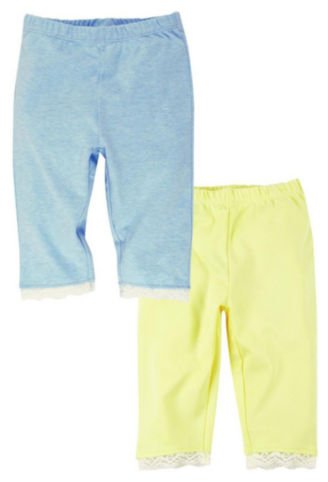

In [71]:
# Kernel
img_kernel = img_init.filter(ImageFilter.Kernel(size=(3,3), kernel=[1 for i in range(9)], scale=None, offset=0))
display_img(img_kernel)

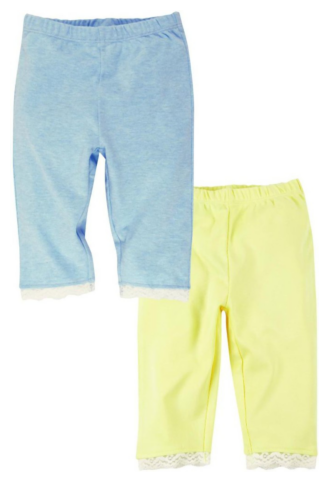

In [72]:
# Median
img_median = img_init.filter(ImageFilter.MedianFilter(size=3)) 
display_img(img_median)

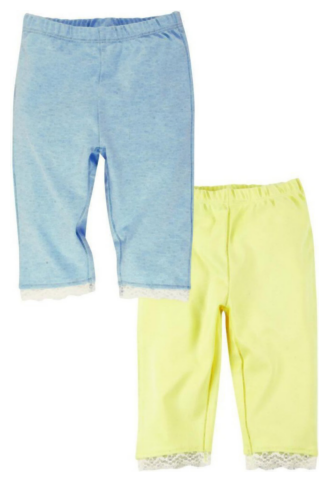

In [73]:
# Min
img_min = img_init.filter(ImageFilter.MinFilter(size=3))
display_img(img_min)

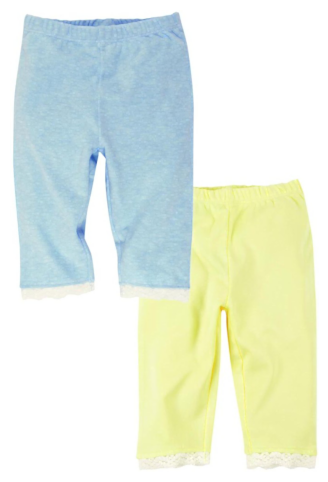

In [74]:
# Max
img_max = img_init.filter(ImageFilter.MaxFilter(size=3))
display_img(img_max)

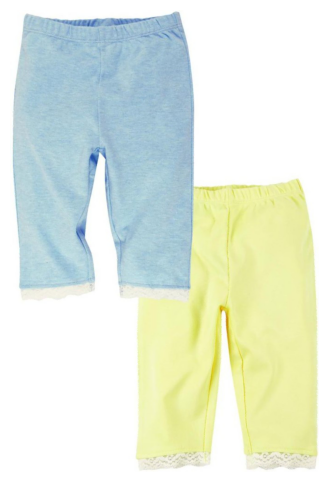

In [75]:
# Mode
img_mode = img_init.filter(ImageFilter.ModeFilter(size=3))
display_img(img_mode)

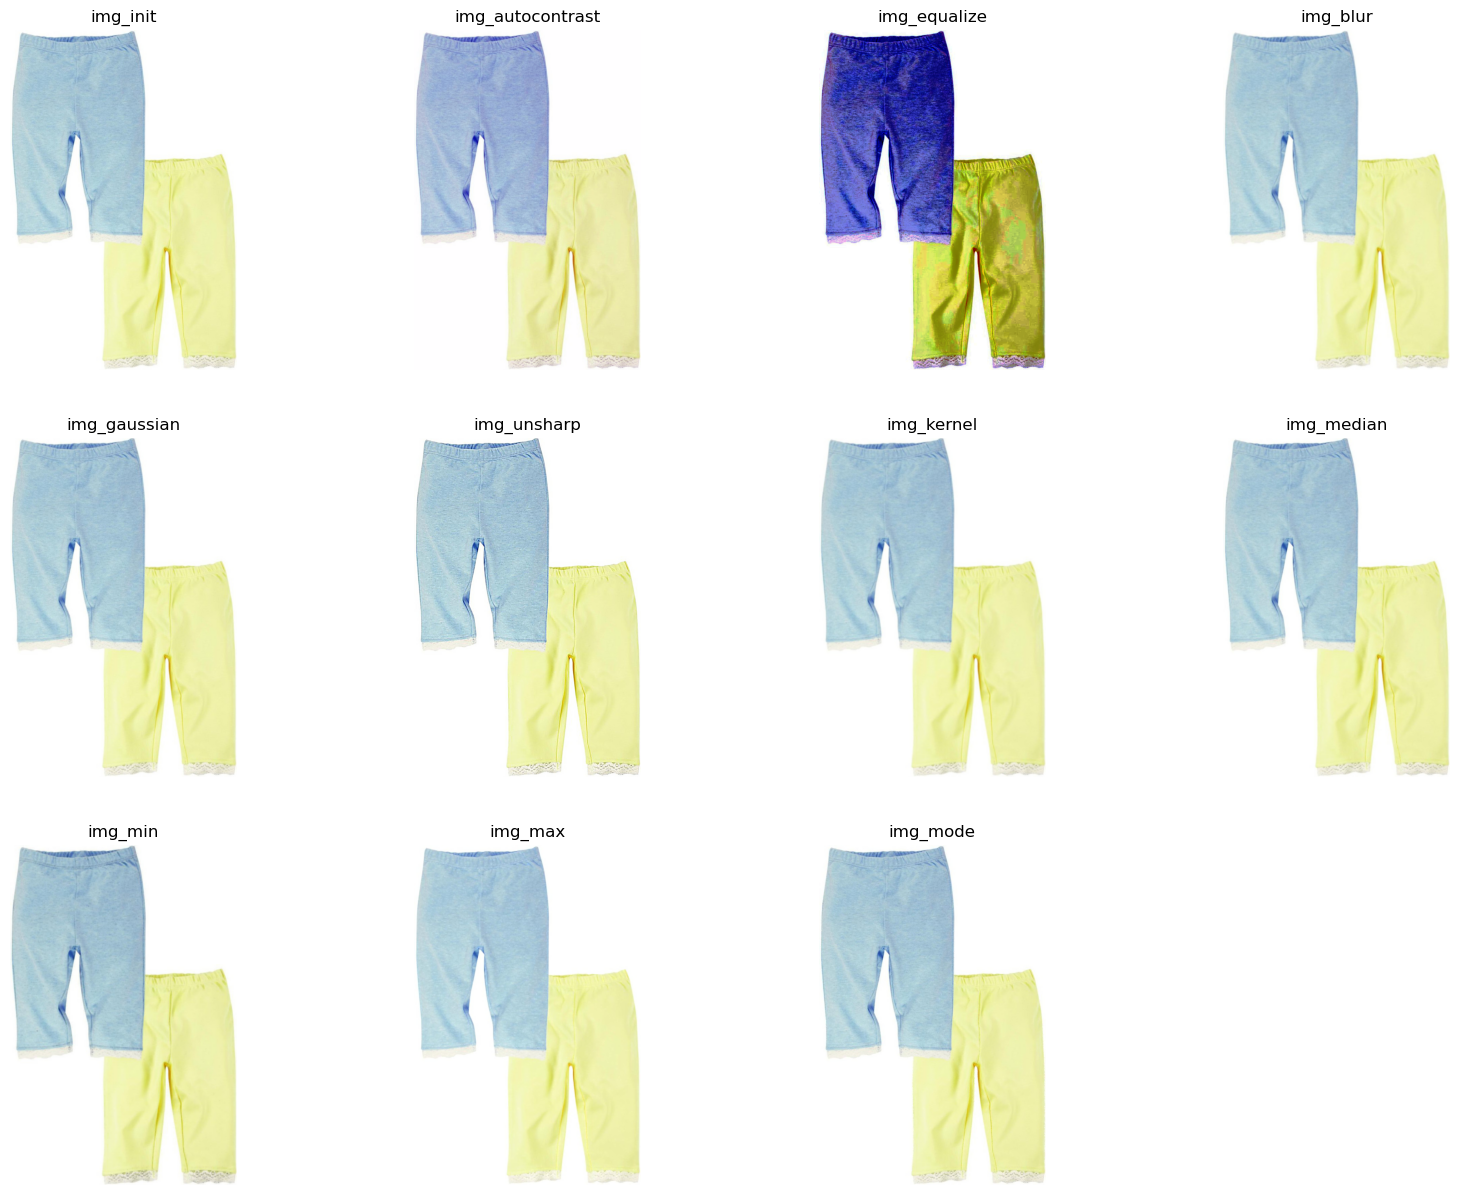

In [76]:
img_list = [img_init, img_autocontrast, img_equalize, 
            img_blur, img_gaussian, img_unsharp, 
            img_kernel, img_median, img_min, img_max, img_mode]
img_names = ['img_init', 'img_autocontrast', 'img_equalize', 
            'img_blur', 'img_gaussian', 'img_unsharp', 
            'img_kernel', 'img_median', 'img_min', 'img_max', 'img_mode']
plt.figure(figsize=(20,15))
i = 1
for img, img_name in zip(img_list, img_names):
    plt.subplot(3, round(len(img_list) / 3), i)
    plt.axis('off')
    plt.title(img_name)
    plt.imshow(img)
    i += 1
plt.show()

# 2.1 SIFT (Scale-invariant feature transform)

[ WARN:0@805.465] global /Users/runner/miniforge3/conda-bld/libopencv_1654292788089/work/opencv_contrib/modules/xfeatures2d/misc/python/shadow_sift.hpp (15) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736



systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



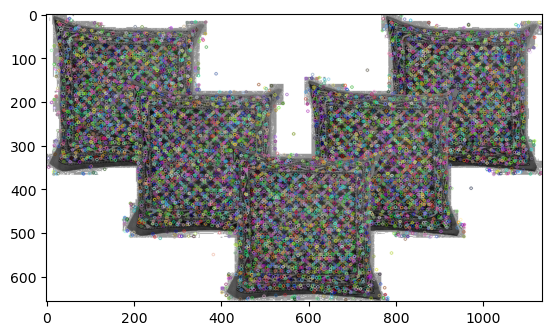

Descripteurs :  (11002, 128)

[[  0.   0.   2. ...   2.   2.  16.]
 [ 27.   2.   2. ...   0.   4.  33.]
 [139.  44.   5. ...   3.   0.   0.]
 ...
 [ 13.  21.   1. ...   0.   1.   4.]
 [  1.   3.   3. ...   0.   0.   0.]
 [ 29.  27.  11. ...   4.  26.   3.]]


In [77]:
sift = cv2.xfeatures2d.SIFT_create()
image = cv2.imread(path+list_photos[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None) # compute descriptors
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

In [78]:
max([max(i) for i in des])

214.0

In [79]:
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create(500)
for image_num in range(len(data['image'])) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+data['image'].iloc[image_num],0) # convert in gray
    res = cv2.equalizeHist(image) # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)
sift_keypoints_by_img = np.asarray(sift_keypoints, dtype='object')
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)
print()
print("Nombre of descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("Temps de calcul des descripteur SIFT : ", "%15.2f" % duration1, "seconds")

0
100
200
300
400
500
600
700
800
900
1000

Nombre of descripteurs :  (517351, 128)
Temps de calcul des descripteur SIFT :           189.62 seconds


In [80]:
# Détermination du nombre de clusters
temps1=time.time()
k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Estimation du nombre de clusters : ", k)
print("Creation de",k, "clusters de descripteurs ...")

# Clustering avec MiniBatchKMeans pour accélérer les temps de calcul
kmeans = cluster.MiniBatchKMeans(n_clusters=k, batch_size=2050, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("Temps de calcul KMeans : ", "%15.2f" % duration1, "seconds")

Estimation du nombre de clusters :  719
Creation de 719 clusters de descripteurs ...
Temps de calcul KMeans :             4.43 seconds


In [81]:
# Creation d'histogrammes (features)
temps1=time.time()
# Création d'une matrice d'histogrammes
hist_vectors=[]
for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calcule l'histogramme
    hist_vectors.append(hist) #l'histogramme est le vecteur de feature
im_features = np.asarray(hist_vectors)
duration1=time.time()-temps1
print("Temps de création des histogrammes : ", "%15.2f" % duration1, "seconds")

0
100
200
300
400
500
600
700
800
900
1000
Temps de création des histogrammes :             1.64 seconds


In [82]:
# Réduction de la dimensionnalité avec ACP/PCA pour accélérer et améliorer les performances de T-SNE (en gardant 99 % de variance)
print("Dimensions du dataset avant réduction ACP/PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions du dataset après réduction ACP/PCA : ", feat_pca.shape)

Dimensions du dataset avant réduction ACP/PCA :  (1050, 719)
Dimensions du dataset après réduction ACP/PCA :  (1050, 497)


In [83]:
# Réduction à 2 composants T-SNE pour la visualisation 2D
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)
df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["primary_category"]
print(df_tsne.shape)

(1050, 3)


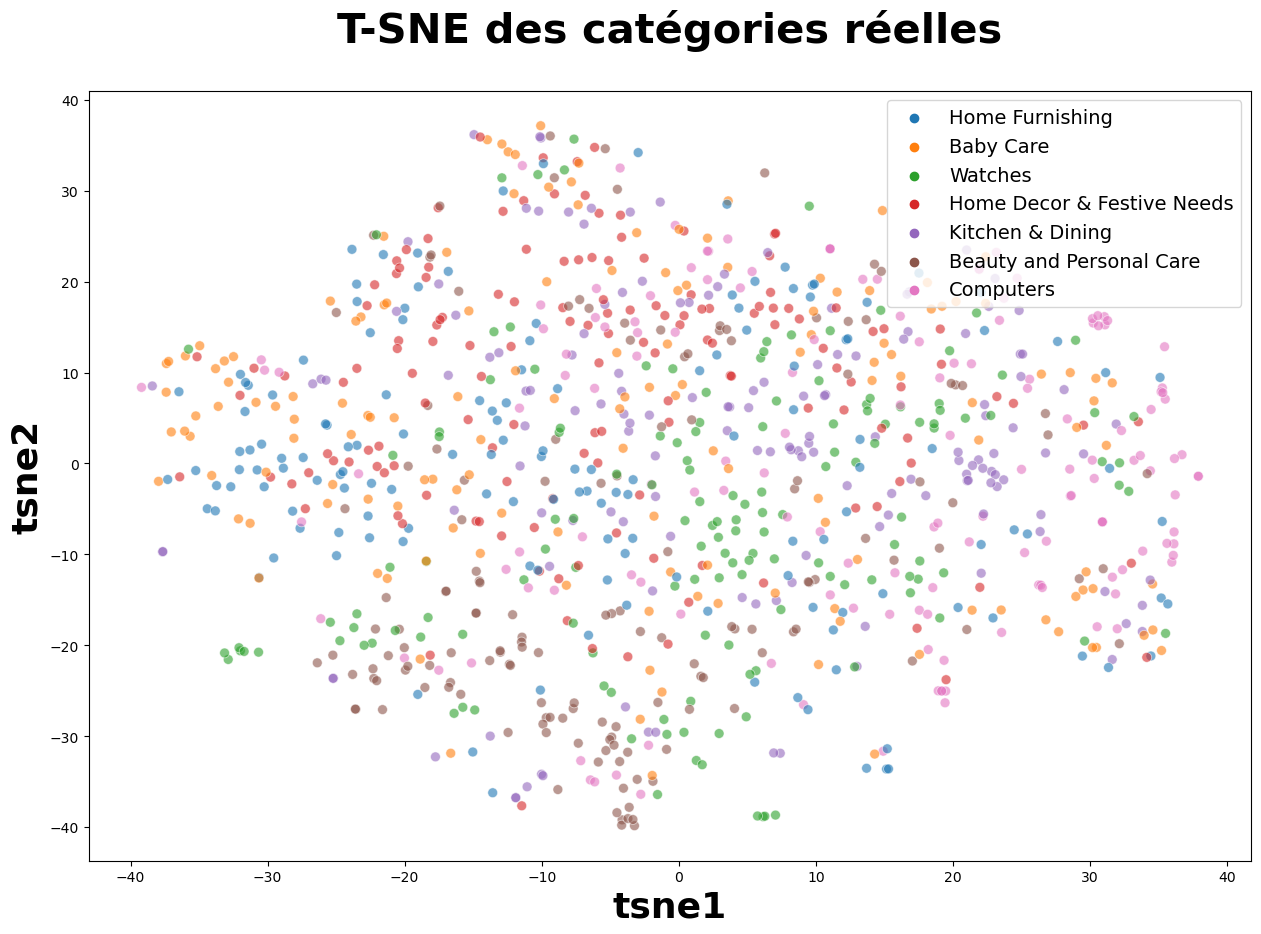

In [84]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)
plt.title('T-SNE des catégories réelles', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 
plt.show()

In [85]:
cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)
df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


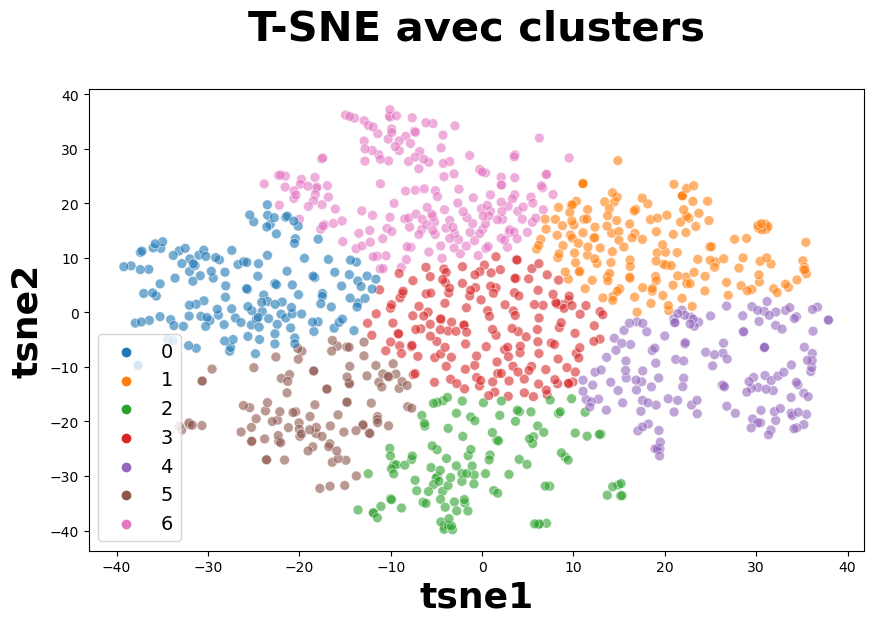

ARI :  0.05930415480302974


In [86]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")
plt.title('T-SNE avec clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 
plt.show()
labels = data["primary_category"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

In [87]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    151
1    168
2    118
3    168
4    150
5    106
6    189
Name: class, dtype: int64

In [88]:
le = preprocessing.LabelEncoder()
labels_trans = le.fit_transform(labels)

In [89]:
conf_mat = metrics.confusion_matrix(labels_trans, cls.labels_)
print(conf_mat)

[[44 26  7 18 19 10 26]
 [ 6 11 48 12 11 40 22]
 [ 7 38 10 12 53  8 22]
 [31 22  4 19  7  8 59]
 [50 16 15 25 14 10 20]
 [ 8 28 11 39 29  6 29]
 [ 5 27 23 43 17 24 11]]


In [90]:
np.argmax(conf_mat, axis=0)

array([4, 2, 1, 6, 2, 1, 3])

In [91]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)    
    # corresp = np.argmax(conf_mat, axis=0)
    corresp = [6, 5, 4, 1, 2, 0, 3]
    print ("Clusters correspondance : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x])    
    return labels['y_pred_transform']
cls_labels_transform = conf_mat_transform(labels_trans, cls.labels_)
conf_mat = metrics.confusion_matrix(labels_trans, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels_trans, cls_labels_transform))

Clusters correspondance :  [6, 5, 4, 1, 2, 0, 3]
[[10 18 19 26  7 26 44]
 [40 12 11 22 48 11  6]
 [ 8 12 53 22 10 38  7]
 [ 8 19  7 59  4 22 31]
 [10 25 14 20 15 16 50]
 [ 6 39 29 29 11 28  8]
 [24 43 17 11 23 27  5]]

              precision    recall  f1-score   support

           0       0.09      0.07      0.08       150
           1       0.07      0.08      0.08       150
           2       0.35      0.35      0.35       150
           3       0.31      0.39      0.35       150
           4       0.13      0.10      0.11       150
           5       0.17      0.19      0.18       150
           6       0.03      0.03      0.03       150

    accuracy                           0.17      1050
   macro avg       0.17      0.17      0.17      1050
weighted avg       0.17      0.17      0.17      1050



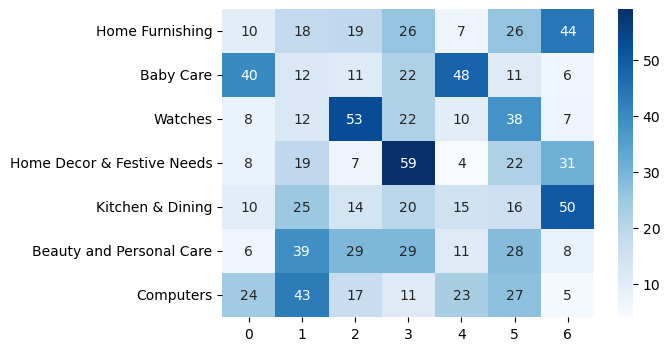

In [92]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in data['primary_category'].unique()],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.show()

# 2.2 - CNN avec VGG16

In [93]:
# Chargement du modèle pre-trained VGG16
model = VGG16()
# suppression l'output layer (classifieur multiclasse), pour ne garder que les features  (1*4096 vecteur de features)
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [94]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [95]:
features_vector = []
for image_num in range(len(data['image'])):
    # chargement d'une image à partir du fichier et redimensionner 224*224*3
    image = load_img(path+data['image'].iloc[image_num], target_size=(224, 224))
    # conversion des pixels de l'image en tableau numpy
    image = img_to_array(image)
    # remodelage des données pour le modèle
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preparation de  l'image pour le modèle VGG
    image = preprocess_input(image)
    # obtention des features extraites
    features = model.predict(image)
    # ajouts de features dans la features list pour chaque image
    features_vector.append(features[0])
# conversion en np.array
im_features_CNN = np.asarray(features_vector)

2022-09-20 11:04:41.498103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 10ms/step


In [96]:
im_features_CNN.shape

(1050, 4096)

In [97]:
# Réduction de la dimensionnalité avec PCA pour accélérer et améliorer les performances de T-SNE (en gardant 99 % de variance)
print("Dimensions du dataset avant réduction ACP/PCA  : ", im_features_CNN.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features_CNN)
print("Dimensions du dataset après réduction ACP/PCA : ", feat_pca.shape)

Dimensions du dataset avant réduction ACP/PCA  :  (1050, 4096)
Dimensions du dataset après réduction ACP/PCA :  (1050, 803)


In [98]:
# Réduction à 2 composants T-SNE pour la visualisation 2D
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)
df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["primary_category"]
print(df_tsne.shape)

(1050, 3)


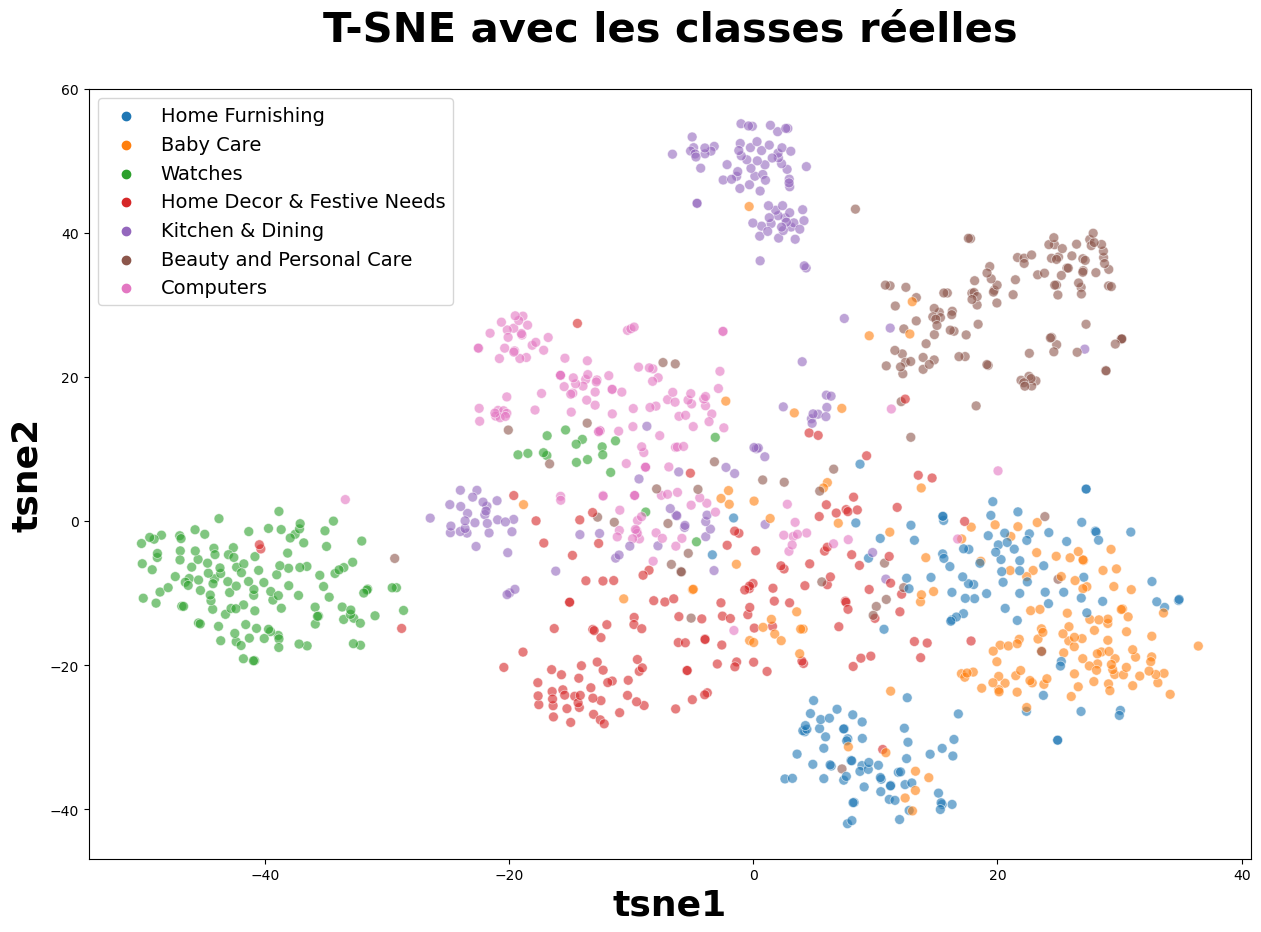

In [99]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)
plt.title('T-SNE avec les classes réelles', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 
plt.show()

In [100]:
cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)
df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


In [101]:
df_tsne.head()

tsne1      tsne2            class  cluster
0   7.743665 -30.225332  Home Furnishing        4
1  18.633244  -5.582587        Baby Care        0
2  22.919231  -6.854493        Baby Care        0
3  14.482818 -32.367859  Home Furnishing        4
4   8.261107 -39.061703  Home Furnishing        4

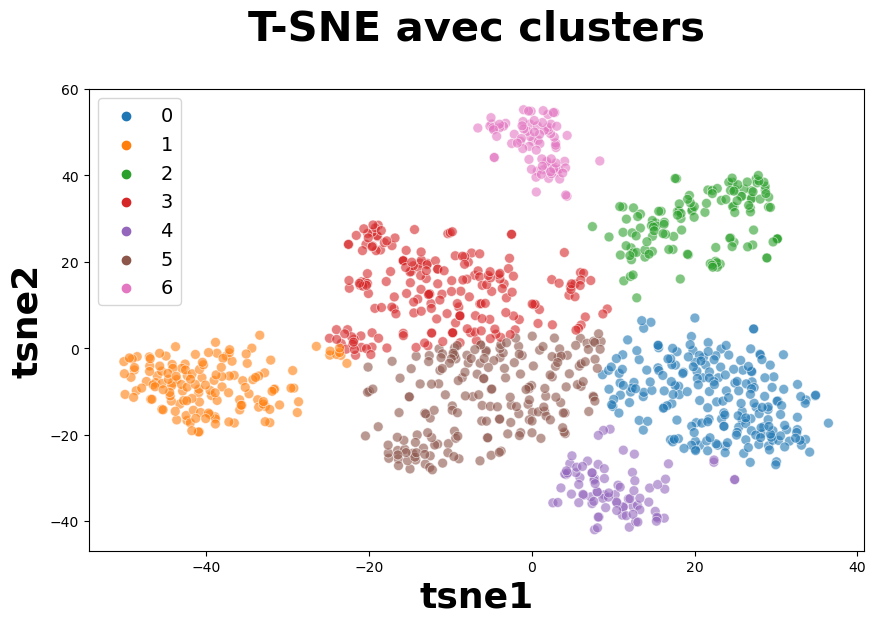

ARI :  0.47558242042992727


In [102]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")
plt.title('T-SNE avec clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 
plt.show()
labels = data["primary_category"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

In [103]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    214
1    146
2    126
3    205
4     84
5    195
6     80
Name: class, dtype: int64

In [104]:
le = preprocessing.LabelEncoder()
labels_trans = le.fit_transform(labels)

In [105]:
conf_mat = metrics.confusion_matrix(labels_trans, cls.labels_)
print(conf_mat)

[[111   0   3   8   9  18   1]
 [  8   1 118  13   1   8   1]
 [  2   1   1 120   0  26   0]
 [ 15   3   1   9   4 118   0]
 [ 76   0   0   1  70   3   0]
 [  2   8   3  38   0  21  78]
 [  0 133   0  16   0   1   0]]


In [106]:
np.argmax(conf_mat, axis=0)

array([0, 6, 1, 2, 4, 3, 5])

In [107]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)   
    corresp = np.argmax(conf_mat, axis=0)
    print ("Clusters correspondance : ", corresp)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x])    
    return labels['y_pred_transform']
cls_labels_transform = conf_mat_transform(labels_trans, cls.labels_)
conf_mat = metrics.confusion_matrix(labels_trans, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels_trans, cls_labels_transform))

Clusters correspondance :  [0 6 1 2 4 3 5]
[[111   3   8  18   9   1   0]
 [  8 118  13   8   1   1   1]
 [  2   1 120  26   0   0   1]
 [ 15   1   9 118   4   0   3]
 [ 76   0   1   3  70   0   0]
 [  2   3  38  21   0  78   8]
 [  0   0  16   1   0   0 133]]

              precision    recall  f1-score   support

           0       0.52      0.74      0.61       150
           1       0.94      0.79      0.86       150
           2       0.59      0.80      0.68       150
           3       0.61      0.79      0.68       150
           4       0.83      0.47      0.60       150
           5       0.97      0.52      0.68       150
           6       0.91      0.89      0.90       150

    accuracy                           0.71      1050
   macro avg       0.77      0.71      0.71      1050
weighted avg       0.77      0.71      0.71      1050



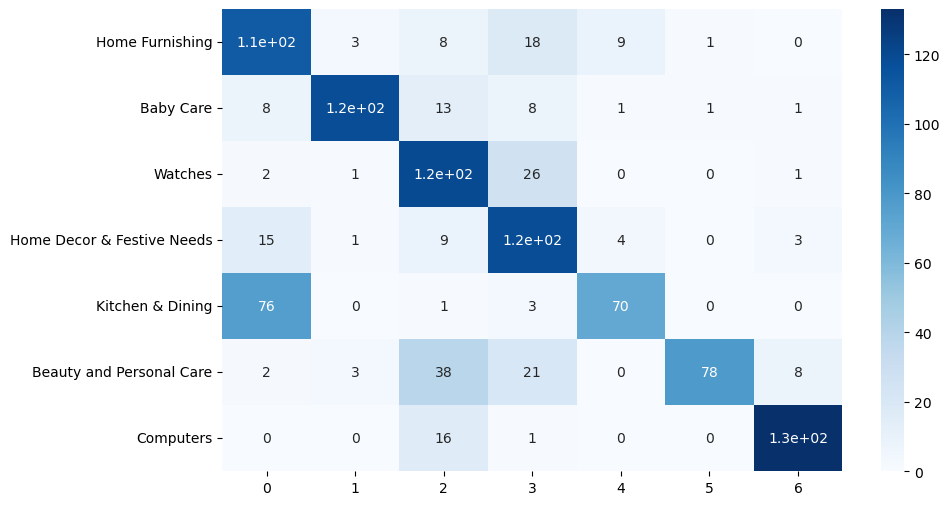

In [108]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in data['primary_category'].unique()],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (10,6))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.show()